## 实现Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1.,2.,3.,4.,5.]) # 加载自定义的数据
y = np.array([1.,3.,2.,3.,5.])

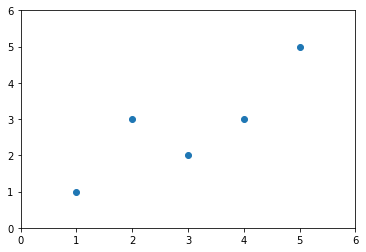

In [3]:
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

$$a = \frac{\sum_{i=1}^{m}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i=1}^{m}{(x_i - \bar{x})^2}},b = \bar{y} - a\bar{x}$$

In [4]:
x_mean = np.mean(x) # 保存均值
y_mean = np.mean(y)

In [5]:
num = 0.0
d = 0.0
for x_i,y_i in zip(x,y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

In [6]:
a = num / d
b = y_mean - a * x_mean

In [7]:
a

0.8

In [8]:
b

0.39999999999999947

In [9]:
y_hat = a * x + b 

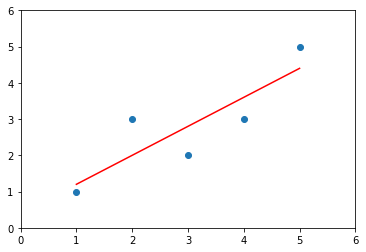

In [10]:
plt.scatter(x,y)
plt.plot(x,y_hat,color='r')
plt.axis([0,6,0,6])
plt.show()

In [11]:
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

### 使用我自己的SimpleLinearRegression 

In [12]:
from SimpleLinearRegression import SimpleLinearRegression1 # 导入我们写的SimpleLinearRegression1

In [13]:
reg1 = SimpleLinearRegression1()
reg1.fit(x,y)

SimpleLinearRegression1()

In [14]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [15]:
reg1.a_ # 查看参数a

0.8

In [16]:
reg1.b_ # 查看参数b

0.39999999999999947

In [17]:
y_hat1 = reg1.predict(x)

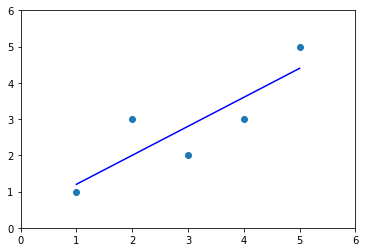

In [18]:
plt.scatter(x,y)
plt.plot(x,y_hat1,color='b')
plt.axis([0,6,0,6])
plt.show()

### 改进算法，利用向量化运算

改进之前的计算:
将
### $$\frac{\sum_{i=1}^{m}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i=1}^{m}{(x_i - \bar{x})^2}}$$
简化为
### $$\sum_{i=1}^{m}{\vec{w_i} \cdot \vec{v_i}} $$

### 向量化实现

In [19]:
from SimpleLinearRegression import SimpleLinearRegression2 # 导入我们改进后的SimpleLinearRegresion2

In [22]:
reg2 = SimpleLinearRegression2()
reg2.fit(x,y)

SimpleLinearRegression2()

In [23]:
reg2.a_

0.8

In [24]:
reg2.b_

0.39999999999999947

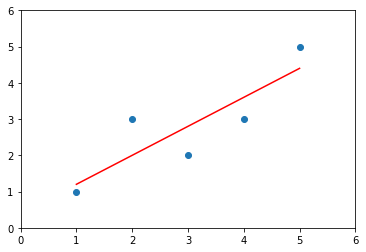

In [25]:
y_hat2 = reg2.predict(x)

plt.scatter(x,y)
plt.plot(x,y_hat2,color='r')
plt.axis([0,6,0,6])
plt.show()

### 向量化实现的性能测试

In [28]:
m = 1000000
big_x  = np.random.random(size=m) # 随机生成1000000个随机数
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m) # 在这随机数的基础上台南佳一个正态分布的干扰项

In [29]:
%timeit reg1.fit(big_x,big_y)
%timeit reg2.fit(big_x,big_y)

1.4 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
41.5 ms ± 2.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
reg1.a_

2.0037540275174113

In [31]:
reg1.b_

2.9988699425400758

In [33]:
reg2.a_

2.003754027517435

In [34]:
reg2.b_

2.998869942540064